# 1. Iris

In [1]:
import numpy as np
import pandas as pd

In [2]:
# a. 붓꽃 종별로 꽃잎길이, 꽃잎폭, 꽃받침길이, 꽃받침폭의 평균, 표준편차 등 기초 통계량을 구하시오

In [3]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.groupby(iris.species).describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [4]:
iris.groupby(iris.species).agg(['mean', 'std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

In [45]:
def get_new_stat(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    higher = q3 +1.5 * iqr
    x[(x > higher) | (x < lower)] = np.nan
    #outlier = x.value_counts().sum() != 50
    outlier = x.isnull().sum() !=  0    #이 코드가 윗줄보다좋음
    return outlier, x.mean(), x.std()

In [46]:
s_sl = iris[iris.species == 'setosa']['sepal_length']
type(s_sl)

pandas.core.series.Series

In [7]:
species = []; items = []
old_mean_list = []; old_std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        s = iris[iris.species == spec][wl]
        #print(f'{spec} {wl}: {s.mean().round(3)}, {s.std().round(3)}')
        species.append(spec); items.append(wl)
        old_mean_list.append(s.mean())
        old_std_list.append(s.std())

In [8]:
tmp_iris = pd.DataFrame({
    'species': species,
    'items': items,
    'old_mean': old_mean_list,
    'old_std': old_std_list
})
new_iris = tmp_iris.set_index(['species', 'items'])
new_iris

old_mean   old_std
species    items                           
setosa     sepal_length     5.006  0.352490
           sepal_width      3.428  0.379064
           petal_length     1.462  0.173664
           petal_width      0.246  0.105386
versicolor sepal_length     5.936  0.516171
           sepal_width      2.770  0.313798
           petal_length     4.260  0.469911
           petal_width      1.326  0.197753
virginica  sepal_length     6.588  0.635880
           sepal_width      2.974  0.322497
           petal_length     5.552  0.551895
           petal_width      2.026  0.274650

In [9]:

outlier_list = []; mean_list = []; std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        s = iris[iris.species == spec][wl]
        outlier, new_mean, new_std = get_new_stat(s)
        #print(f'{spec} {wl}: {outlier}, {new_mean.round(3)}, {new_std.round(3)}')    
        outlier_list.append(outlier)
        mean_list.append(new_mean); std_list.append(new_std)

In [10]:
new_iris['outlier'] = outlier_list
new_iris['new_mean'] = mean_list
new_iris['new_std'] = std_list
new_iris

old_mean   old_std  outlier  new_mean   new_std
species    items                                                        
setosa     sepal_length     5.006  0.352490    False  5.006000  0.352490
           sepal_width      3.428  0.379064     True  3.431250  0.320343
           petal_length     1.462  0.173664     True  1.460870  0.129062
           petal_width      0.246  0.105386     True  0.233333  0.085883
versicolor sepal_length     5.936  0.516171    False  5.936000  0.516171
           sepal_width      2.770  0.313798    False  2.770000  0.313798
           petal_length     4.260  0.469911     True  4.285714  0.437798
           petal_width      1.326  0.197753    False  1.326000  0.197753
virginica  sepal_length     6.588  0.635880     True  6.622449  0.593459
           sepal_width      2.974  0.322497     True  2.955319  0.260275
           petal_length     5.552  0.551895    False  5.552000  0.551895
           petal_width      2.026  0.274650    False  2.026000  0.274650

# 2. 타이타닉

In [11]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### a. 타이타닉호의 승객에 대해 나이와 성별에 의한 카테고리 열인  category1열을 만드시오. category1 카테고리는 다음과 같이 정의됨
####   1) 20살이 넘으면 성별을 그대로 사용한다.
####   2) 20살 미만이면 성별에 관계없이 'child'라고 한다.

In [12]:

titanic['category1'] = titanic.apply(lambda r: r.sex if r.age >= 20 else 'child', axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


#### b. 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이값이 되도록 titanic 데이터 프레임을 고치시오.

In [13]:
titanic.age = titanic.age.fillna(round(titanic.age.mean()))
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
5,0,3,male,30.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,child
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,male
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,female
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,child


#### c. 성별, 선실별, 출발지별 생존율 구하기

In [14]:
# 성별, 선실별 생존률
titanic.pivot_table('survived', index='who', columns='class', margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


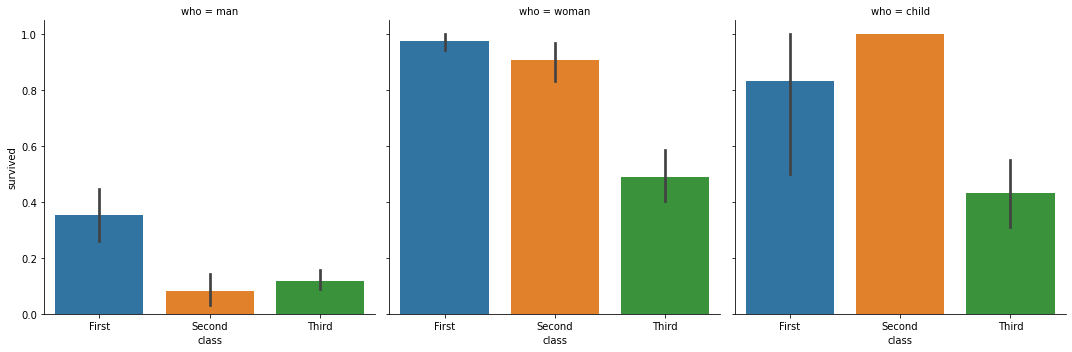

In [15]:
sns.catplot(x='class', y='survived',
            col='who', kind='bar',
            data=titanic);

In [16]:
# 선실별, 출발지별생존율
titanic.pivot_table('survived', index='embark_town', columns='class', margins=True)

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


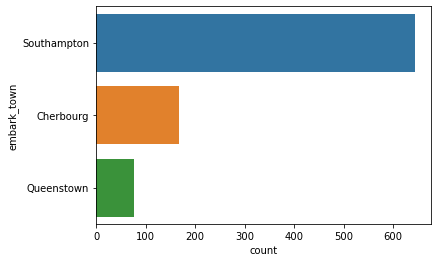

In [17]:
sns.countplot(y='embark_town', data=titanic);

### d. 타이타닉호 승객을 '미성년자', '청년', '중년', '장년', '노년' 나이 그룹으로 나누고, 각 그룹별 생존율을 구하시오.
### bins = [1, 20, 30, 50, 70, 100]
### lavels = ["미성년자", "청년", "중년", "장년", "노년"]

In [18]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(titanic.age, bins, labels=labels)
type(cats)

pandas.core.series.Series

In [19]:
titanic['나이그룹'] = cats

In [20]:
나이그룹 = titanic.pivot_table('survived','나이그룹',None, aggfunc='mean')
그룹 = titanic.pivot_table('survived','나이그룹',None, aggfunc='mean')
나이그룹

,survived
나이그룹,
미성년자,0.424242
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


### e. qcut 명령으로 세개의 나이 그룹을 만들고, 나이 그룹별 남녀성비와 생존율을 구하시오

In [21]:
qcat = pd.qcut(titanic.age, 3, labels=['1/3','2/3','3/3'])
titanic['Q나이그룹'] = qcat

In [22]:
Q나이그룹 = titanic.pivot_table('survived','Q나이그룹',None, aggfunc='mean')
Q나이그룹


,survived
Q나이그룹,
1/3,0.411960
2/3,0.335526
3/3,0.405594


# 3. mile per gallon

In [23]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [24]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### a. 배기량 대비마력 열(hp_per_cc)을 추가하시오

In [25]:
mpg['hp_per_cc'] = mpg.displacement / mpg.horsepower
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,2.361538
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,2.121212
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,2.120000
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,2.026667
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,2.157143


### b. name으로부터 manufacturer(제조사)와 모델을 추출하여 새로운 열 manufacturer와 model을 추가하고, name열은 삭제 하시오

In [26]:
def get_mfger(full_name):
    return full_name.split()[0]
def get_model(full_name):
    return ' '.join(full_name.split()[1:])

In [27]:
get_mfger('chrysler lebaron medallion'), get_model('chrysler lebaron medallion')

('chrysler', 'lebaron medallion')

In [28]:
get_mfger('ford torino'), get_model('ford torino')

('ford', 'torino')

In [29]:
mpg['manufacturer'] = mpg.name.apply(get_mfger)
mpg['model'] = mpg.name.apply(get_model)
del mpg['name']
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,2.361538,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,2.121212,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,2.120000,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,2.026667,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,2.157143,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,1.627907,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,1.865385,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,1.607143,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,1.518987,ford,ranger


### c. 엔진의 실린더 갯수별 연비의 평균을 구하시오

In [33]:
mpg.pivot_table('mpg', 'cylinders')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


### d. 생산지별 배기량  대비 마력의 평균을 구하시오

In [35]:
mpg.groupby('origin')[['hp_per_cc']].mean()

,hp_per_cc
origin,
europe,1.405597
japan,1.304120
usa,2.048289


### e. 모델이 5개 이상인 제조사에 대하여 연비(mpg)의 평균이 가장 좋은 제조사 Top5를 구하시오

In [36]:
mpg.manufacturer.value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
volvo             6
chrysler          6
vw                6
renault           5
subaru            4
opel              4
saab              4
chevy             3
cadillac          2
mercedes-benz     2
maxda             2
bmw               2
vokswagen         1
hi                1
chevroelt         1
capri             1
nissan            1
toyouta           1
mercedes          1
triumph           1
Name: manufacturer, dtype: int64

In [38]:
a =mpg.manufacturer.value_counts()
big = a[a >=5].index.tolist()
print(big)

['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun', 'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'oldsmobile', 'mazda', 'peugeot', 'fiat', 'audi', 'volvo', 'chrysler', 'vw', 'renault']


In [40]:
mpg[mpg['manufacturer'].isin(big)].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,2.361538,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,2.121212,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,2.120000,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,2.026667,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,2.157143,ford,torino


In [42]:
mpg[mpg['manufacturer'].isin(big)][['manufacturer','mpg']].groupby('manufacturer').mean()


,mpg
manufacturer,
amc,18.246429
audi,26.714286
buick,19.182353
chevrolet,20.472093
chrysler,17.266667
datsun,31.113043
dodge,22.060714
fiat,28.912500
ford,19.694118


In [43]:
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer')

,mpg
manufacturer,
amc,18.246429
audi,26.714286
buick,19.182353
chevrolet,20.472093
chrysler,17.266667
datsun,31.113043
dodge,22.060714
fiat,28.912500
ford,19.694118


In [44]:
mpg[mpg['manufacturer'].isin(big)].pivot_table('mpg','manufacturer').sort_values(by='mpg', ascending=False)[:5]

,mpg
manufacturer,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000
